* [RandomForestのグリッドサーチ](http://blog.tatsushim.com/?p=63)
* [最適なグリッドサーチ](http://sssslide.com/speakerdeck.com/anaguma2261/scikit-learndexue-buji-jie-xue-xi-ru-men)
* [SVM実践ガイド](http://www.slideshare.net/sleepy_yoshi/svm-13435949)

In [3]:
%matplotlib inline

In [4]:
from IPython.display import display
from matplotlib import pyplot as plt
from collections import Counter
import MeCab
import zenhan
import pandas as pd
import numpy as np
import sys
import io
import re
import seaborn

pd.set_option('precision',3)
pd.set_option('max_columns',100)

#-----------------------------------------------------------------------------------------
def check_input_rate(df):
    
    df = pd.concat([df.dtypes,                            #型
                                df.count(),                           #入力数
                                len(df) - df.count(),            #NaN数
                                df.count() / len(df) * 100 #入力率
                                ], axis=1)
    df.columns = ["型","入力数","NaN数","入力率"]
    
    return df

#-----------------------------------------------------------------------------------------
def check_column_data(df, value):
    
    df = df.replace(np.NaN, "null") #NaNをカウントするため置換
    df = pd.concat([df.groupby(value).size(), 
                                df.groupby(value).size() / df[value].count() * 100],
                                axis = 1)
    df = df.rename(index={"null":"NaN"},
                               columns = {0:"件数", 1:"割合"})
    
    return df

#-----------------------------------------------------------------------------------------

:0: FutureWarning: IPython widgets are experimental and may change in the future.


###データ取得

In [37]:
from bs4 import BeautifulSoup
from urllib import request
import requests

req = requests.get('https://ja.wikipedia.org/wiki/Python' )
soup = BeautifulSoup(req.text.encode(req.encoding))

In [61]:
for text in soup.find_all("p"):
    print(text.get_text())

■カテゴリ / ■テンプレート
Python（パイソン）は、汎用のプログラミング言語である。コードの可読性が高くなるように言語を設計していると主張されている。その構文のおかげで、Cなどの言語に比べて、より少ないコード行数でプログラムを表現できる[14][15]と主張されている。小規模なプログラムから大規模なプログラムまで、さまざまなプログラムを分かり易く書けるように、多くのコードを提供している[16]。
Pythonは複数のプログラミングパラダイムに対応している。オブジェクト指向、命令型、手続き型、関数型などの形式でプログラムを書くことができる。Pythonは動的型付け言語であり、参照カウントベースの自動メモリ管理（ガベージコレクタ）を持つ。さまざまな領域に対応する大規模な標準ライブラリを提供している[17]。
Pythonは、汎用のプログラミング言語として設計している。標準ライブラリや他者製のライブラリも充実している。そのためPythonはWebアプリケーションやデスクトップアプリケーションなどの開発はもとより、システム用の記述 (script) や、各種の自動処理、理工学や統計解析のための道具としてなど、幅広い領域で使用されている。ヨーロッパ製の道具類では、その道具の命令がPythonを使っているものがある。
Pythonのリファレンス実装であるCPythonは、フリーかつオープンソースのソフトウェアであり、コミュニティベースの開発モデルを採用している。CPythonは、非営利団体であるPythonソフトウェア財団が管理している。その他の実装としては、PyPyやIronPythonなどが有名である。
Pythonは、オランダ人のグイド・ヴァンロッサムが開発した。名前の由来は、イギリスのテレビ局 BBC が製作したコメディ番組『空飛ぶモンティ・パイソン』である。Pythonという英単語が意味する爬虫類のニシキヘビがPython言語のマスコットやアイコンとして使われている。


Pythonは汎用の高水準言語である。プログラマの生産性とコードの信頼性を重視して設計している。核となる文法（シンタックス）および意味（セマンティクス）は必要最小限に抑えている。反面、利便性の高い大規模な標準ライブラリを備えている。
後述するように、多くの計算機とOS (プラットフォーム) 

In [8]:
url = 'https://ja.wikipedia.org/wiki/Python'
dataframes = pd.io.html.read_html(url)
dataframes

[    0                                                  1
 0 NaN  この項目では、プログラミング言語について説明しています。その他の用法については「パイソン」を...,
                                0  \
 0                          パラダイム   
 1                           登場時期   
 2                            設計者   
 3                            開発者   
 4                         最新リリース   
 5                            型付け   
 6                          主な処理系   
 7                             方言   
 8                       影響を受けた言語   
 9                       影響を与えた言語   
 10                      プラットフォーム   
 11                         ライセンス   
 12                        ウェブサイト   
 13                           拡張子   
 14  Python Programming - ウィキブックス   
 
                                                     1  
 0         マルチパラダイム: オブジェクト指向, 命令形, 関数型, 手続き型, リフレクティブ  
 1                                  1991年（25年前） （1991）  
 2                                         グイド・ヴァンロッサム  
 3                                      Pythonソフトウェア財団  
 4  

In [7]:
pd.io.html.read_html(url)

[                     0    1           2
 0            課税される所得金額   税率         控除額
 1              195万円以下   5%          0円
 2     195万円を超え 330万円以下  10%     97,500円
 3     330万円を超え 695万円以下  20%    427,500円
 4     695万円を超え 900万円以下  23%    636,000円
 5   900万円を超え 1,800万円以下  33%  1,536,000円
 6  1,800万円を超え4.000万円以下  40%  2,796,000円
 7             4,000万円超  45%  4,796,000円,
                     0    1           2
 0           課税される所得金額   税率         控除額
 1             195万円以下   5%          0円
 2    195万円を超え 330万円以下  10%     97,500円
 3    330万円を超え 695万円以下  20%    427,500円
 4    695万円を超え 900万円以下  23%    636,000円
 5  900万円を超え 1,800万円以下  33%  1,536,000円
 6            1,800万円超  40%  2,796,000円,
                     0    1           2
 0           課税される所得金額   税率         控除額
 1             330万円以下  10%          0円
 2    330万円を超え 900万円以下  20%    330,000円
 3  900万円を超え 1,800万円以下  30%  1,230,000円
 4            1,800万円超  37%  2,490,000円]

###形態素解析

In [6]:
tagger = MeCab.Tagger("-Owakati -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd")
tagger.parse('') #超重要おまじない

'\n'

In [7]:
def morpheme(text, debug = "off"):
    
    text = zenhan.z2h(text, mode = 3) #全角to半角
    text = text.lower()                             #大文字to小文字

    pattern = re.compile("[!-/:-@[-`{-~]")
    text = pattern.sub("、", text)
    text = text.replace('\r\n', '、')
    text = text.replace('\r', '、')
    text = text.replace('\\n', '、')
    text = text.replace(" ","、")
    text = text.replace("n","、")
    
    if debug == "on":
        print("\n##############################################")
        print(text)
        print("##############################################\n")

    word = ""
    words = []
    node = tagger.parseToNode(text)    
    
    while node:
        feature = node.feature.split(",")       
        surface = node.surface                       
        
        if(feature[0] == "BOS/EOS"):
            node = node.next
            continue           
        elif (feature[0] != "助詞" and 
                feature[0] != "助動詞" and 
                feature[0] != "記号" and 
                feature[0] != "連体詞" and
                feature[0] != "接頭詞" and
                not(feature[0] == "名詞" and feature[1] == "非自立") and
                not(feature[0] == "名詞" and feature[1] == "名詞接続") and
                not(feature[0] == "名詞" and feature[1] == "接尾" and feature[2] == "特殊") and 
                not(feature[0] == "動詞" and feature[1] == "非自立") and
                not(feature[0] == "動詞" and feature[1] == "接尾") and
                not(feature[0] == "動詞" and feature[1] == "自立" and feature[4] == "サ変・スル")) :
            word = surface
            words.append(word)
            
        if debug == "on":
            print("%s \n \t %s" %(node.surface, node.feature))
            print("------------------【%s】------------------\n" %(word))
        
        word = ""
        node = node.next
        
    return words

###単語カウント

In [8]:
output1 = pd.DataFrame(columns=  ["domain","cate","score","word"])
index = 0

for i, row in data[0:].iterrows():
    for word in morpheme(row.text): 
        output1 = output1.append(pd.DataFrame({"domain":row.domain, "cate":row.cate, "score":row.score, "word":word}, index = [index]))
        index += 1
        
#頻出単語カウント
output2 = output1
pd.options.display.max_rows = 50
output2.groupby('word').size().order(ascending = False)

NameError: name 'data' is not defined

###word2vec

In [47]:
#形態素解析(1文章1行)
corpus = pd.DataFrame(columns=  ["wakati"])
index = 0

for i, row in data[0:].iterrows():
    wakati_list = morpheme(row.text)
    wakati_str = " ".join(wakati_list)
    corpus = corpus.append(pd.DataFrame({"wakati":wakati_str}, index = [index]))
    index += 1

In [53]:
from gensim.models import word2vec

corpus.to_csv("./corpus_wakati.text", index = False) 
sentences = word2vec.Text8Corpus("./corpus_wakati.text")
model = word2vec.Word2Vec(sentences, size=300, window=5)

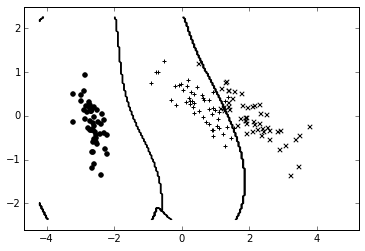

In [58]:
for i, j in model.most_similar(positive=["車両"], negative=[]):
    print("%s \t %s" %(i, j))

###係り受け解析

In [ ]:
import CaboCha
from collections import defaultdict 

c = CaboCha.Parser("-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd") #ipadict
#c = CaboCha.Parser("-d /usr/local/lib/mecab/dic/mecab-unidic-neologd/") #unidict

In [ ]:
def word_extract(tree, start_pos, end_pos):
    
    word = ""
    stop_flg = "off"
    
    
    for i in range(start_pos, end_pos):
        token = tree.token(i)

        features = token.feature.split(",")       
        surface   = token.surface
        
        #print("　",token.surface,"\t",token.feature)
      
        if (stop_flg == "off" and
             features[0] != "助詞" and 
             features[0] != "助動詞" and 
             features[0] != "記号" and 
             features[0] != "連体詞" and
             features[0] != "接頭詞" and
             not(features[0] == "名詞" and features[1] == "非自立") and
             not(features[0] == "名詞" and features[1] == "名詞接続") and
             not(features[0] == "名詞" and features[1] == "接尾" and features[2] == "特殊") and 
             not(features[0] == "動詞" and features[1] == "非自立") and
             not(features[0] == "動詞" and features[1] == "接尾") and
             not(features[0] == "動詞" and features[1] == "自立" and features[4] == "サ変・スル") and
             len(features) >= 7) :
            word += features[6] #活用形登録
        elif(word != "" and stop_flg == "off"):
            stop_flg = "on"

    return word

In [ ]:
output = pd.DataFrame(columns=  ["word1", "word2", "number" , "domain" , "cate" , "score" , "text"])
index = 0

for number, row in data[0:].iterrows():
    
    domain = row.domain
    cate = row.cate
    score = row.score
    origin_text = row.text
    text = row.text
    
    text = zenhan.z2h(text, mode = 3) #全角to半角
    text = text.lower()                             #大文字to小文字
    pattern = re.compile("[!-/:-@[-`{-~]")
    text = pattern.sub("、", text)
    text = text.replace('\r\n', '、')
    text = text.replace('\r', '、')
    text = text.replace('\\n', '、')
    text = text.replace(" ","、")
    text = text.replace("n","、")
    
    split_text = re.split("[。、]",text) #句読点は別文章として扱う

    for text in split_text:
    
        tree = c.parse(text)
        
        #print("\n■"+text)

        # chunk_iteration
        for i in range(tree.chunk_size()):

            chunk = tree.chunk(i)
            word1 = ""
            word2 = ""
            
            # token1_iteration
            if(chunk.link != -1):
                word1 = word_extract(tree, chunk.token_pos, chunk.token_pos + chunk.token_size)
                #print("　□word1----------------------",word1,"----------------------\n")

            # token2_iteration (link)
            if(word1 != "" and chunk.link != -1):
                chunk = tree.chunk(chunk.link)
                word2 = word_extract(tree, chunk.token_pos, chunk.token_pos + chunk.token_size)
                #print("　□word2----------------------",word2,"----------------------\n\n")
            
                #係り受け登録
                if(word2 != ""): 
                    output = output.append(pd.DataFrame({"word1":word1, "word2":word2, "number":number , "domain":domain , "cate":cate , "score":score, "text":origin_text}, index = [index]))
                    index += 1

In [ ]:
#係り受け頻出順
kakari = pd.DataFrame(output.groupby(['word1','word2']).size().order(ascending=False), columns=["num"])
kakari.reset_index(level=[0,1], inplace=True)

pd.options.display.max_rows = 50
kakari.head(50)